0- Installazione pacchetti ed import

In [1]:
pip install pyclustering

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

In [3]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

1 - CLUSTERING CAM DATASET

In [4]:
filename='CAM-dataset/datasetCam.csv'
separator=';'
dataCAM= pd.read_csv(filename, sep=separator)

In [5]:
dataCAM.head()

,source,destination,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,causeCodeIfSpecial,stationType,Unnamed: 10
0,18,NaN,2,487669280,114602490,800001,0.659493,N,NaN,5,NaN
1,92,NaN,2,487659630,114599970,800001,0.786275,N,NaN,5,NaN
2,18,NaN,2,487669310,114602500,800001,0.859765,N,NaN,5,NaN
3,92,NaN,2,487659650,114599980,800001,0.986003,N,NaN,5,NaN
4,18,NaN,2,487669360,114602510,800001,1.159490,N,NaN,5,NaN


In [6]:
columnsname= ['source','referencePositionLat','referencePositionLong','referencePositionAlt']
data_position=dataCAM[columnsname].astype(float)

In [7]:
data_position.head()

,source,referencePositionLat,referencePositionLong,referencePositionAlt
0,18.0,487669280.0,114602490.0,800001.0
1,92.0,487659630.0,114599970.0,800001.0
2,18.0,487669310.0,114602500.0,800001.0
3,92.0,487659650.0,114599980.0,800001.0
4,18.0,487669360.0,114602510.0,800001.0


In [8]:
#sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
sample=data_position.values.tolist()
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()
xmeans_instance = xmeans(sample, initial_centers, 20)
xmeans_instance.process()
clusters1= xmeans_instance.get_clusters()
centroids1= xmeans_instance.get_centers()

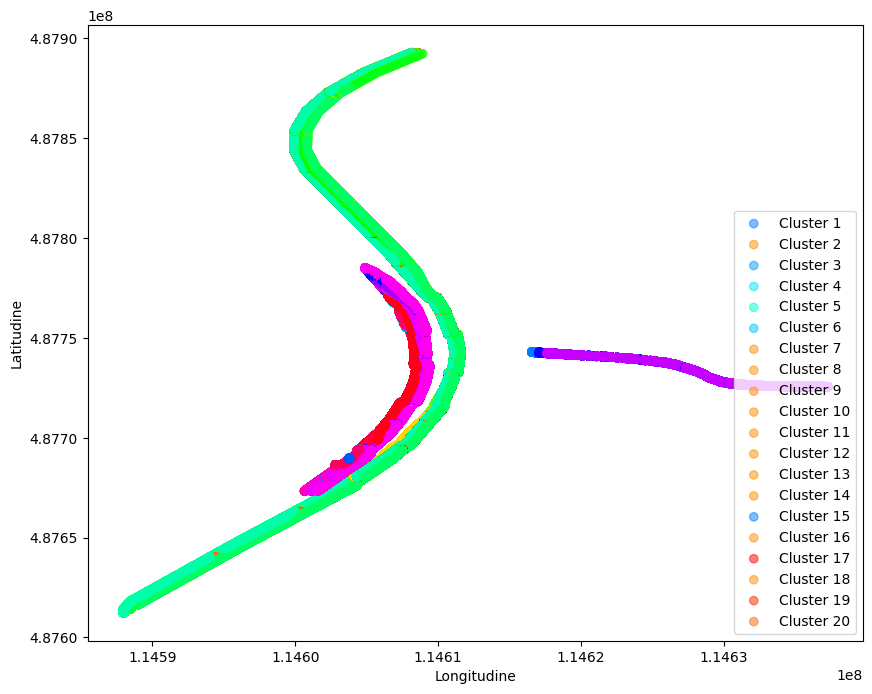

In [9]:
utils.plot_clustering(sample,clusters1)

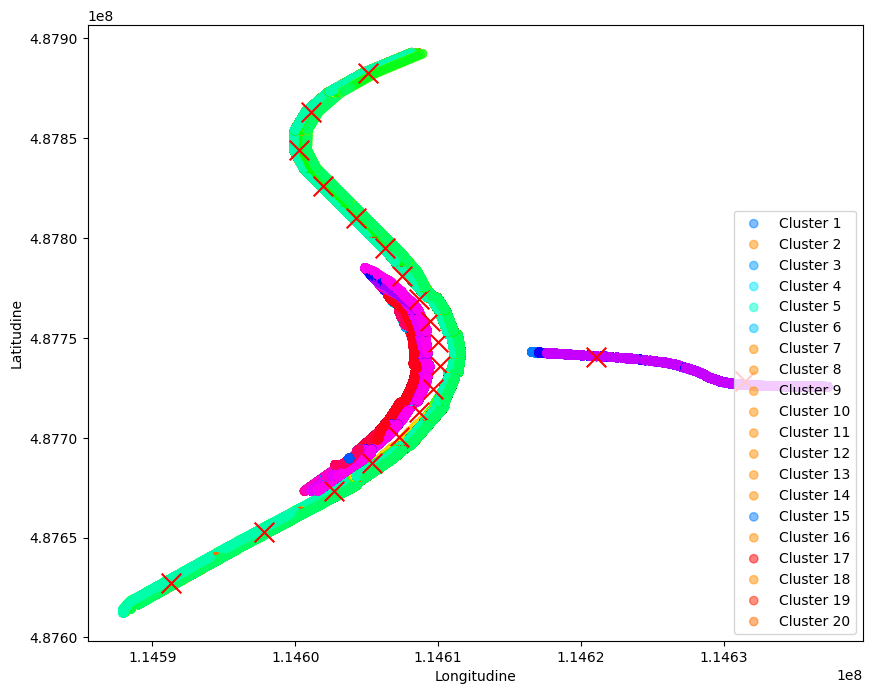

In [10]:
utils.plot_clustering_with_centroids(sample,clusters1,centroids1)

2 - CLUSTERING DENM DATASET

In [11]:
filename2='DENM-dataset/datasetDen.csv'
separator=';'
dataDENM= pd.read_csv(filename2, sep=separator)

In [12]:
dataDENM.head()

,source,destination,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,termination,stationType,Unnamed: 17
0,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
1,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
2,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
3,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
4,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN


In [13]:
columnsname2= ['source','eventPos_lat','eventPos_long','eventPos_alt']
data_position2=dataDENM[columnsname2].astype(float)

In [14]:
data_position2.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166.0,487672120.0,114603240.0,800001.0
1,166.0,487672120.0,114603240.0,800001.0
2,166.0,487672120.0,114603240.0,800001.0
3,166.0,487672120.0,114603240.0,800001.0
4,166.0,487672120.0,114603240.0,800001.0


In [15]:
#sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
sample2=data_position2.values.tolist()
amount_initial_centers2 = 2
initial_centers2 = kmeans_plusplus_initializer(sample2, amount_initial_centers2).initialize()
xmeans_instance2 = xmeans(sample2, initial_centers2, 20)
xmeans_instance2.process()
clusters2= xmeans_instance2.get_clusters()
centroids2= xmeans_instance2.get_centers()

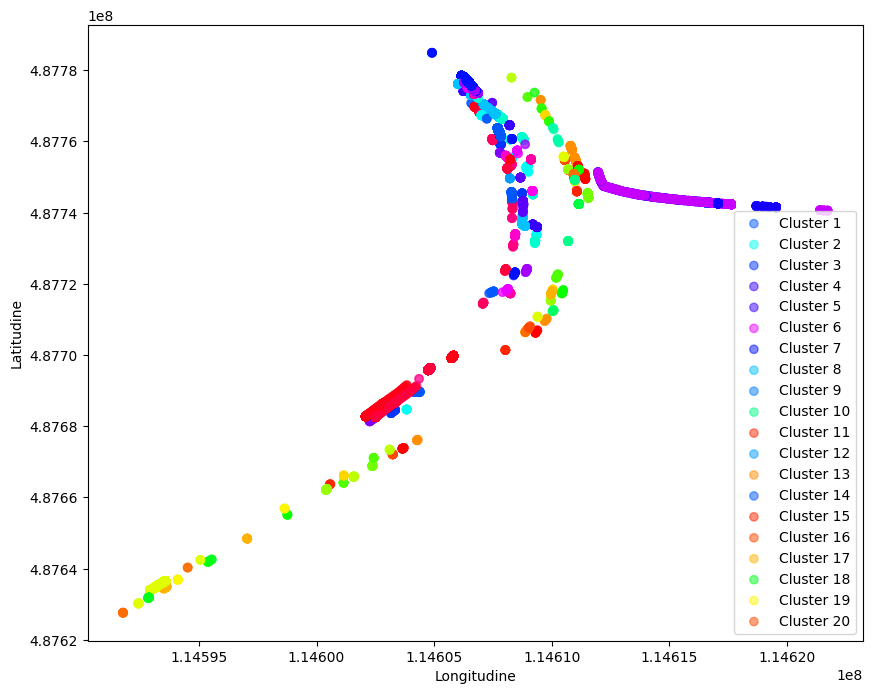

In [16]:
utils.plot_clustering(sample2,clusters2)

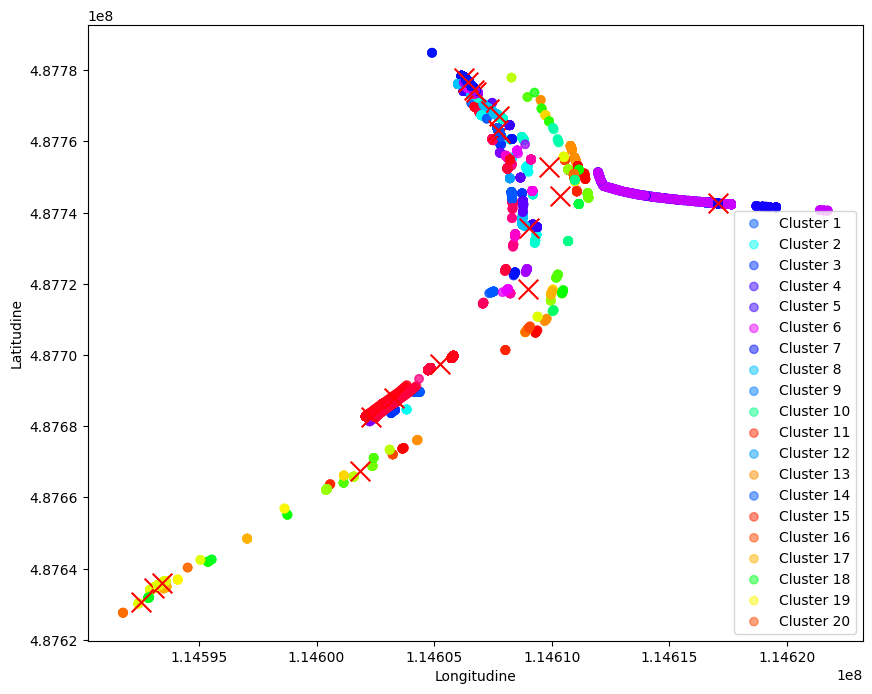

In [17]:
utils.plot_clustering_with_centroids(sample2,clusters2,centroids2)

Plotting dei clustering di entrambi i dataset

c:\Users\Acer\Dropbox\PC\Desktop\attprog_sec\utils.py:78: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data[:, 2], cluster_data[:, 1], c=cluster_color, alpha=0.5, label=f'Cluster 1-{i+1}')


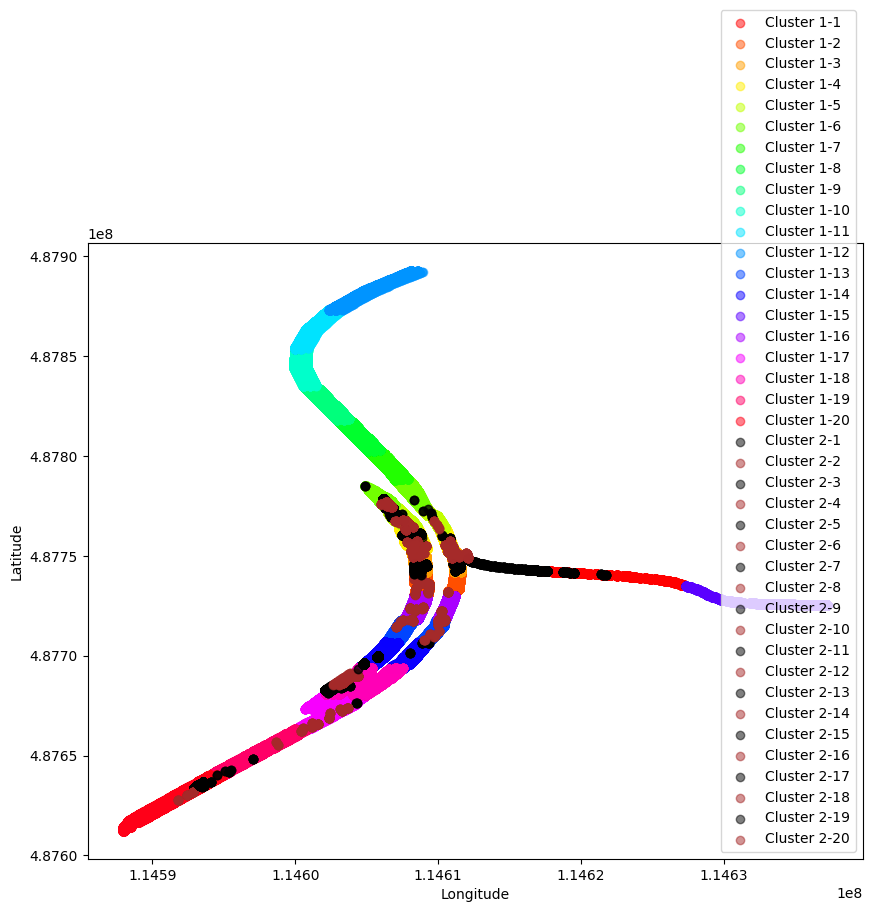

In [18]:
utils.plot_two(sample,sample2,clusters1,clusters2)

3 - CLUSTERING DELL'INTERO DATASET DENM

In [19]:
import struct

In [20]:
def hex_to_float(hex_string):
    int_value = int(hex_string, 16)
    # Usa la funzione struct.unpack per convertire l'intero in un float
    float_value = struct.unpack('f', struct.pack('I', int_value))[0]
    return float_value


In [21]:
dataDENM.head()

,source,destination,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,termination,stationType,Unnamed: 17
0,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
1,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
2,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
3,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
4,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN


In [22]:
column_nan=dataDENM.columns[dataDENM.isna().all()].tolist()
column_nan

['destination', 'termination', 'Unnamed: 17']

In [23]:
datadropped= dataDENM.drop(columns=column_nan)
datadropped

,source,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType
0,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
1,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
2,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
3,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
4,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595987,3052,1,3052:5258,1,1,0,1856,425563814200,425563814200,673.2740,487682610,114602500,800001,0x560b09c19c50,0
595988,3126,1,3126:5849,1,1,0,1856,425563873200,425563873200,673.3320,487682780,114602090,800001,0x560b0a191e30,0
595989,3052,1,3052:5848,1,1,0,1856,425563873200,425563873200,673.3340,487682610,114602500,800001,0x560b09b35ac0,0
595990,3126,1,3126:5260,1,1,0,1856,425563814300,425563814300,673.3920,487682780,114602090,800001,0x560b0a0d6320,0


In [24]:
# Converti la colonna esadecimale in float
datadropped['relevanceDistance'] = datadropped['relevanceDistance'].apply(lambda x: int(x, 16)).astype(float)

In [25]:
datadropped.head()

,source,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType
0,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
1,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
2,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
3,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
4,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0


In [26]:
# Creazione di due nuove colonne per separare l'ID
datadropped[['Numero_ID', 'Identificatore']] = datadropped['actionID'].str.split(':', expand=True)

# Converti la colonna 'Numero_ID' in float
datadropped['Numero_ID'] = datadropped['Numero_ID'].astype(float)
datadropped['Identificatore'] = datadropped['Identificatore'].astype(float)

In [27]:
datadropped= datadropped.drop(columns='actionID')

In [28]:
datadropped.head()

,source,messageID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType,Numero_ID,Identificatore
0,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
1,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
2,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
3,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
4,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0


In [29]:
datadropped =datadropped.astype(float)

In [30]:
datadropped.head()

,source,messageID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType,Numero_ID,Identificatore
0,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
1,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
2,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
3,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
4,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0


In [31]:
sample3=datadropped.values.tolist()
amount_initial_centers3 = 2
initial_centers3 = kmeans_plusplus_initializer(sample3, amount_initial_centers3).initialize()
xmeans_instance3 = xmeans(sample3, initial_centers3, 20)
xmeans_instance3.process()
clusters3= xmeans_instance3.get_clusters()
centroids3= xmeans_instance3.get_centers()

In [32]:
#manca il grafico

4- CLUTERING INTERO DATASET CAM

In [33]:
dataCAM.head()

,source,destination,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,causeCodeIfSpecial,stationType,Unnamed: 10
0,18,NaN,2,487669280,114602490,800001,0.659493,N,NaN,5,NaN
1,92,NaN,2,487659630,114599970,800001,0.786275,N,NaN,5,NaN
2,18,NaN,2,487669310,114602500,800001,0.859765,N,NaN,5,NaN
3,92,NaN,2,487659650,114599980,800001,0.986003,N,NaN,5,NaN
4,18,NaN,2,487669360,114602510,800001,1.159490,N,NaN,5,NaN


In [34]:
column_nanCAM=dataCAM.columns[dataCAM.isna().all()].tolist()
column_nanCAM

['destination', 'causeCodeIfSpecial', 'Unnamed: 10']

In [35]:
datadroppedCAM= dataCAM.drop(columns=column_nanCAM)
datadroppedCAM

,source,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,stationType
0,18,2,487669280,114602490,800001,0.659493,N,5
1,92,2,487659630,114599970,800001,0.786275,N,5
2,18,2,487669310,114602500,800001,0.859765,N,5
3,92,2,487659650,114599980,800001,0.986003,N,5
4,18,2,487669360,114602510,800001,1.159490,N,5
...,...,...,...,...,...,...,...,...
368395,1276,2,487874420,114603610,800001,113.199000,N,5
368396,1128,2,487891780,114608740,800001,113.291000,N,5
368397,1276,2,487874950,114603740,800001,113.399000,N,5
368398,1128,2,487892300,114608920,800001,113.491000,N,5


In [36]:
def letter_to_binary(letter):
    unicode_value = ord(letter)
    binary_representation = bin(unicode_value)[2:]  # Rimuovi il prefisso '0b'
    return binary_representation


In [37]:
datadroppedCAM['isSpecialVehicle'] = datadroppedCAM['isSpecialVehicle'].apply(letter_to_binary)


In [38]:
def binary_to_float(binary):
    decimal_value = int(binary, 2)
    return float(decimal_value)

In [39]:
datadroppedCAM['isSpecialVehicle'] = datadroppedCAM['isSpecialVehicle'].apply(binary_to_float)

In [40]:
datadroppedCAM.head()

,source,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,stationType
0,18,2,487669280,114602490,800001,0.659493,78.0,5
1,92,2,487659630,114599970,800001,0.786275,78.0,5
2,18,2,487669310,114602500,800001,0.859765,78.0,5
3,92,2,487659650,114599980,800001,0.986003,78.0,5
4,18,2,487669360,114602510,800001,1.159490,78.0,5


In [41]:
datadroppedCAM =datadroppedCAM.astype(float)

In [42]:
sample4=datadroppedCAM.values.tolist()
amount_initial_centers4 = 2
initial_centers4 = kmeans_plusplus_initializer(sample4, amount_initial_centers4).initialize()
xmeans_instance4 = xmeans(sample4, initial_centers4, 20)
xmeans_instance4.process()
clusters4= xmeans_instance4.get_clusters()
centroids4= xmeans_instance4.get_centers()

In [43]:
#qui manca il grafico

5- Clustering svolto considerando l'event type come parametro di rilevanza

In [44]:
columnsnameEVENT= ['source','eventPos_lat','eventPos_long','eventPos_alt', 'situation_eventType']
data_positionEVENT=dataDENM[columnsnameEVENT].astype(float)

In [45]:
sampleE=data_positionEVENT.values.tolist()
amount_initial_centersE = 2
initial_centersE = kmeans_plusplus_initializer(sampleE, amount_initial_centersE).initialize()
xmeans_instanceE = xmeans(sampleE, initial_centersE, 20)
xmeans_instanceE.process()
clustersE= xmeans_instanceE.get_clusters()
centroidsE= xmeans_instanceE.get_centers()

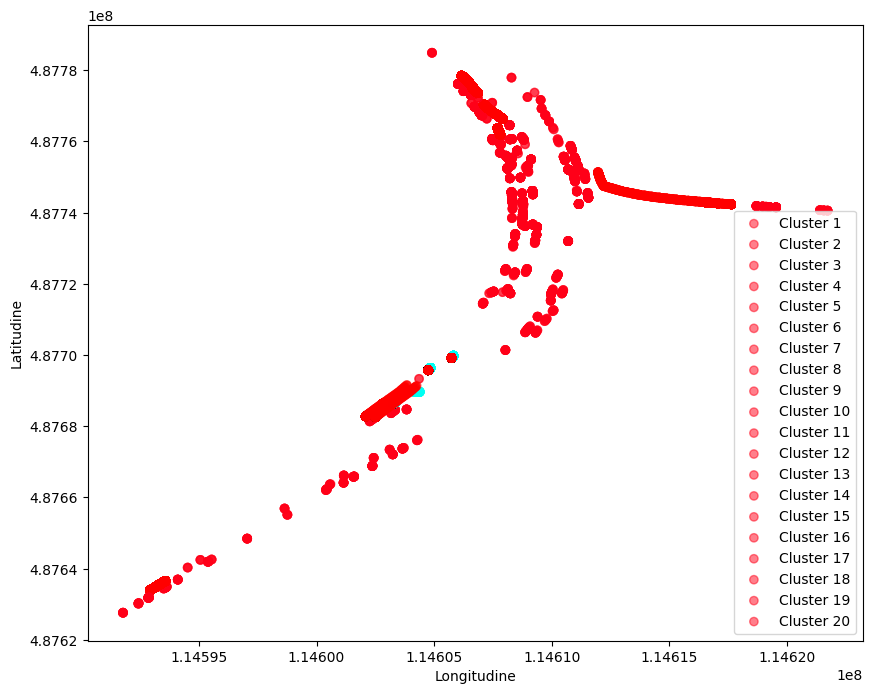

In [46]:
utils.plot_clustering_event(sampleE,clustersE)

6- Sporcatura del dataset denm

In [47]:
columnsdirty= ['source','eventPos_lat','eventPos_long','eventPos_alt']
datadirty=dataDENM[columnsdirty]

In [48]:
datadirty.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166,487672120,114603240,800001
1,166,487672120,114603240,800001
2,166,487672120,114603240,800001
3,166,487672120,114603240,800001
4,166,487672120,114603240,800001


In [49]:

# Funzione per calcolare nuove coordinate (latitudine e longitudine) date coordinate di partenza
def nuove_coordinate(latitudine, longitudine):
    mean = 0  # Media della distribuzione gaussiana
    std_deviation = 1
    variazione_metri = np.random.normal(mean, std_deviation) * 100  
    metri_per_grado_lat = 111320.0 
    metri_per_grado_long = 111320.0 * np.cos(np.radians(latitudine/1e7)) 
    variazione_gradi = variazione_metri / metri_per_grado_lat
    variazione_gradi_long = variazione_metri / metri_per_grado_long
    #print(variazione_gradi*1e7)
    #print(variazione_gradi_long*1e7)
    
    # Calcola le nuove coordinate
    nuova_latitudine = round(latitudine + variazione_gradi*1e7)
    nuova_longitudine = round(longitudine + variazione_gradi_long*1e7)

    return nuova_latitudine, nuova_longitudine





'''
# Esempio di utilizzo:
latitudine_iniziale = 487672456  
longitudine_iniziale = 114630240 
nuova_lat, nuova_long = nuove_coordinate(latitudine_iniziale, longitudine_iniziale)
print("Latitudine di partenza:", latitudine_iniziale)
print("Longitudine di partenza:", longitudine_iniziale)
print("Nuova latitudine:", nuova_lat)
print("Nuova longitudine:", nuova_long)
'''

'\n# Esempio di utilizzo:\nlatitudine_iniziale = 487672456  \nlongitudine_iniziale = 114630240 \nnuova_lat, nuova_long = nuove_coordinate(latitudine_iniziale, longitudine_iniziale)\nprint("Latitudine di partenza:", latitudine_iniziale)\nprint("Longitudine di partenza:", longitudine_iniziale)\nprint("Nuova latitudine:", nuova_lat)\nprint("Nuova longitudine:", nuova_long)\n'

In [50]:
# Modifica delle coordinate ogni 1000esima entry

for i in range(0, len(datadirty)-1, 10000):
    lat = datadirty.loc[i, 'eventPos_lat']
    long = datadirty.loc[i, 'eventPos_long']

    nuova_lat, nuova_long = nuove_coordinate(lat, long) 
    #print(lat, 'lat')
    #print(long, 'long')
    datadirty.loc[i, 'eventPos_lat'] = nuova_lat 
    datadirty.loc[i, 'eventPos_long'] = nuova_long 
    #print(nuova_lat ,'latitudine,' ,nuova_long ,'longitudine')


C:\Users\Acer\AppData\Local\Temp\ipykernel_14884\86129428.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadirty.loc[i, 'eventPos_lat'] = nuova_lat
C:\Users\Acer\AppData\Local\Temp\ipykernel_14884\86129428.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadirty.loc[i, 'eventPos_long'] = nuova_long


In [51]:
pd.set_option('display.float_format', '{:.6f}'.format)

datadirty.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166,487678759,114613313,800001
1,166,487672120,114603240,800001
2,166,487672120,114603240,800001
3,166,487672120,114603240,800001
4,166,487672120,114603240,800001


In [52]:
'''
for i in np.arange(0,590000,200):
  print(datadirty.iloc[i])
'''

'\nfor i in np.arange(0,590000,200):\n  print(datadirty.iloc[i])\n'

In [53]:
data_positionDIRTY=datadirty.astype(float) 

In [54]:
data_positionDIRTY.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166.000000,487678759.000000,114613313.000000,800001.000000
1,166.000000,487672120.000000,114603240.000000,800001.000000
2,166.000000,487672120.000000,114603240.000000,800001.000000
3,166.000000,487672120.000000,114603240.000000,800001.000000
4,166.000000,487672120.000000,114603240.000000,800001.000000


In [55]:
#sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
sampleD=data_positionDIRTY.values.tolist()
amount_initial_centersD = 2
initial_centersD = kmeans_plusplus_initializer(sampleD, amount_initial_centersD).initialize()
xmeans_instanceD = xmeans(sampleD, initial_centersD, 20)
xmeans_instanceD.process()
clustersD= xmeans_instanceD.get_clusters()
centroidsD= xmeans_instanceD.get_centers()

In [56]:
dataset = datadropped.copy()
dataset = dataset.drop(columns='Numero_ID')
dataset = dataset.drop(columns='Identificatore')
dataset['eventPos_lat'] = datadirty['eventPos_lat']
dataset['eventPos_long'] = datadirty['eventPos_long']
dataset.to_csv('dataset_denm_dirty.csv', index=False)  # salvo il dataset sporcato

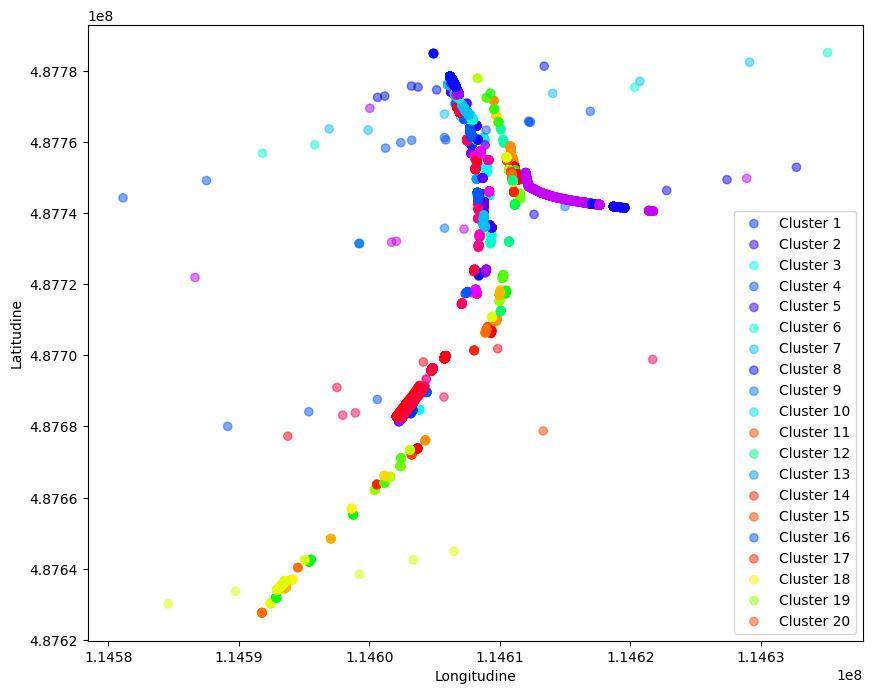

In [57]:
utils.plot_clustering(sampleD,clustersD)

7- Clustering dei dati della RSU

In [58]:
filename='datasetCamRSU.csv'
separator=';'
dataCAM_RSU= pd.read_csv(filename, sep=separator)

In [59]:
columnsnameRSU= ['source','referencePositionLat','referencePositionLong','referencePositionAlt']
data_position_RSU=dataCAM_RSU[columnsnameRSU].astype(float)

In [60]:
#sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
sampleRSU=data_position_RSU.values.tolist()
amount_initial_centersR = 2
initial_centersR = kmeans_plusplus_initializer(sampleRSU, amount_initial_centersR).initialize()
xmeans_instanceRSU = xmeans(sampleRSU, initial_centersR, 20)
xmeans_instanceRSU.process()
clustersRSU= xmeans_instanceRSU.get_clusters()
centroidsRSU= xmeans_instanceRSU.get_centers()

In [61]:
#utils.plot_clustering(sampleRSU, clustersRSU) 

In [62]:
#utils.plot_clustering_with_centroids(sampleRSU,clustersRSU, centroidsRSU)

8- Pulire il dataset in base ai parametri sul tempo

In [63]:
dataDENM.head()

,source,destination,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,termination,stationType,Unnamed: 17
0,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
1,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
2,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
3,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
4,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN


In [64]:
timecolumns = ['source', 'situation_informationQ', 'situation_eventType', 'detection_time', 'reference_time', 'simulation_time',	'eventPos_lat', 'eventPos_long', 'eventPos_alt']
datatimeDENM = dataDENM[timecolumns]

In [65]:
datatimeDENM.head()

,source,situation_informationQ,situation_eventType,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt
0,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
1,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
2,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
3,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
4,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001


In [66]:
tmcolumns = ['source', 'referencePositionLat',	'referencePositionLong',	'referencePositionAlt',	'simulationTime']
datatimeCAM = dataCAM[tmcolumns]

In [67]:
datatimeCAM.head()

,source,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime
0,18,487669280,114602490,800001,0.659493
1,92,487659630,114599970,800001,0.786275
2,18,487669310,114602500,800001,0.859765
3,92,487659650,114599980,800001,0.986003
4,18,487669360,114602510,800001,1.159490


In [68]:
 # 1. SimTime starts from zero, we need it in ms TAI format
from datetime import datetime
import v2v

tai_sync = datetime.strptime('2004-01-01 00:00:00', '%Y-%m-%d %H:%M:%S') 
# The former value is usually based on your local timezone. We need to convert to UTC as the time used in the dataset
utc_tai_sync = datetime.utcfromtimestamp(tai_sync.timestamp()) 
temp_start_time = datetime.strptime('2017-06-26 12:00:00', '%Y-%m-%d %H:%M:%S')
new_start_time = (temp_start_time.timestamp()*1000) - (utc_tai_sync.timestamp() * 1000) 
datatimeDENM['message_reception_time'] =  (datatimeDENM['simulation_time']*1000) + new_start_time
datatimeCAM['message_reception_time'] =  (datatimeCAM['simulationTime']*1000) + new_start_time

C:\Users\Acer\AppData\Local\Temp\ipykernel_14884\2761496625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatimeDENM['message_reception_time'] =  (datatimeDENM['simulation_time']*1000) + new_start_time
C:\Users\Acer\AppData\Local\Temp\ipykernel_14884\2761496625.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatimeCAM['message_reception_time'] =  (datatimeCAM['simulationTime']*1000) + new_start_time


In [69]:
datatimeDENM = datatimeDENM.sort_values(by=['message_reception_time'])
datatimeCAM = datatimeCAM.sort_values(by=['message_reception_time'])

In [70]:
for index, row in datatimeDENM.iterrows():
  if index == 0:
    continue
message_age = row['message_reception_time'] - row['detection_time']
time_threshold = v2v.thresholds[row['situation_eventType']] * 1000
for i in time_threshold:
  if message_age <= time_threshold[i]:
    row.drop(index)

In [71]:
datatimeDENM.head()

,source,situation_informationQ,situation_eventType,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,message_reception_time
0,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
1,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
2,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
3,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
4,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012


In [72]:
datatimeDENM= datatimeDENM.loc[datatimeDENM['situation_informationQ'] > 0.6]